In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn import preprocessing 

In [2]:
liver_df=pd.read_csv("Resources/Liver.csv",encoding= 'unicode_escape')

liver_df.tail(20)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
30671,50.0,Male,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,2
30672,57.0,Female,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,2
30673,45.0,Male,1.3,0.4,482.0,102.0,80.0,6.9,3.3,0.90,1
30674,60.0,Female,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,2
30675,45.0,Male,14.2,7.8,374.0,38.0,77.0,4.3,2.0,0.80,1
30676,23.0,Male,1.4,0.6,263.0,38.0,66.0,5.8,2.2,0.61,1
30677,22.0,Male,2.7,1.3,275.0,123.0,73.0,6.2,3.3,1.10,1
30678,22.0,Male,2.4,1.1,168.0,33.0,50.0,5.1,2.6,1.00,1
30679,74.0,Male,0.6,0.1,160.0,42.0,110.0,4.9,2.6,1.10,2
30680,25.0,NaN,NaN,NaN,630.0,25.0,47.0,6.1,2.3,0.60,2


In [3]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [4]:
liver_df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [5]:
# enc=LabelEncoder()
liver_df['Age of the patient'] = liver_df['Age of the patient'].fillna(0).astype(int)
print(liver_df['Age of the patient'].dtype)


int32


In [6]:
liver_df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30691.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.104330,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.984489,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
liver_df=liver_df.dropna()
liver_df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [8]:
liver_df=liver_df.drop_duplicates()
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16390 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16390 non-null  int32  
 1   Gender of the patient                 16390 non-null  object 
 2   Total Bilirubin                       16390 non-null  float64
 3   Direct Bilirubin                      16390 non-null  float64
 4    Alkphos Alkaline Phosphotase         16390 non-null  float64
 5    Sgpt Alamine Aminotransferase        16390 non-null  float64
 6   Sgot Aspartate Aminotransferase       16390 non-null  float64
 7   Total Protiens                        16390 non-null  float64
 8    ALB Albumin                          16390 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16390 non-null  float64
 10  Result                                16390 non-null  int64  
dtypes: float64(8), 

In [9]:
liver_df['Result'].value_counts()

1    11751
2     4639
Name: Result, dtype: int64

In [10]:
liver_df['Result']= liver_df['Result'].astype("category")

In [11]:
#One-hot encode categorical variables
category_col = ['Gender of the patient','Result']
labelEncoder = preprocessing.LabelEncoder()
 
mapping_dict = {}
for col in category_col:
    liver_df[col] = labelEncoder.fit_transform(liver_df[col])
 
    name_mapping = dict(zip(labelEncoder.classes_,
                               labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dict[col] = name_mapping
print(mapping_dict)

{'Gender of the patient': {'Female': 0, 'Male': 1}, 'Result': {1: 0, 2: 1}}


In [12]:
liver_df['Result'].value_counts()

0    11751
1     4639
Name: Result, dtype: int64

In [13]:
y=liver_df['Result']
x=liver_df.drop(['Result'],axis=1)

In [14]:
import missingno

missingno.bar(liver_df)

ModuleNotFoundError: No module named 'missingno'

<Axes: ylabel='Gender of the patient'>

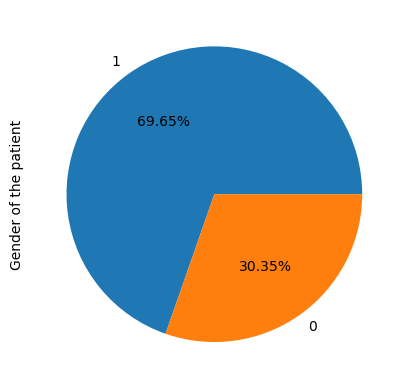

In [16]:
liver_df["Gender of the patient"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [17]:
for col in liver_df.columns:
    fig = px.histogram(liver_df, x=col, color="Result", nbins=20, title=f'Histogram of {col} by Result')
    fig.show()

In [18]:
# Calculate the correlation between Age and Total Bilirubin
correlation = liver_df['Age of the patient'].corr(liver_df['Total Bilirubin'])

# Print the correlation coefficient
print("Correlation between Age and Total Bilirubin:", correlation)

Correlation between Age and Total Bilirubin: -0.00100440997448594


In [19]:
# Calculate the correlation matrix
correlation_matrix = liver_df[['Age of the patient', 'Total Bilirubin']].corr()

# Create a heatmap using Plotly Express
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis')
fig.update_layout(
    title="Correlation Heatmap: Age vs Total Bilirubin"
)

fig.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
X_test.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
8411,7,1,1.2,0.3,498.0,28.0,25.0,7.0,3.0,0.7
5057,29,1,2.7,1.3,580.0,142.0,68.0,8.0,4.0,1.0
1526,70,1,0.7,0.2,218.0,47.0,26.0,6.6,3.3,1.0
26246,13,1,7.7,4.1,268.0,213.0,168.0,7.1,4.0,1.2
12966,50,0,2.7,1.6,157.0,149.0,156.0,7.9,3.1,0.6


In [21]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


scaler= StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-2.23262131,  0.66398729, -0.3492594 , ...,  0.47806542,
        -0.16164598, -0.75970395],
       [-0.90289388,  0.66398729, -0.10943781, ...,  1.38786   ,
         1.09116293,  0.16567754],
       [ 1.5752345 ,  0.66398729, -0.42919993, ...,  0.11414758,
         0.21419669,  0.16567754],
       ...,
       [ 0.66860217,  0.66398729, -0.38123561, ..., -0.24977025,
        -0.03636509,  0.16567754],
       [-0.84245173,  0.66398729, -0.28530697, ...,  0.75100379,
        -0.91333133, -1.68508544],
       [ 0.12462276,  0.66398729, -0.42919993, ...,  0.2961065 ,
         0.33947758,  0.16567754]])

In [22]:
import tensorflow as tf

# Create a Sequential model
data_model = tf.keras.models.Sequential()

# Add the first hidden layer with 16 units, input dimension 11, and ReLU activation
data_model.add(tf.keras.layers.Dense(units=20, input_dim=10, activation="relu"))

# Add the second hidden layer with 12 units and ReLU activation
data_model.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Add the third hidden layer with 8 units and ReLU activation
data_model.add(tf.keras.layers.Dense(units=12, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation (for binary classification)
data_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Print the summary of the model
data_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 12)                192       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 740
Trainable params: 740
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
data_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [24]:

# Train the model using your training data
data_model.fit(X_train_scaled, y_train, epochs=100)



Epoch 1/100
410/410 [==============================] - 2s 2ms/step - loss: 0.5251 - accuracy: 0.7163
Epoch 2/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4953 - accuracy: 0.7216
Epoch 3/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.7290
Epoch 4/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4802 - accuracy: 0.7265
Epoch 5/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.7238
Epoch 6/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.7261
Epoch 7/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4645 - accuracy: 0.7327
Epoch 8/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.7340
Epoch 9/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.7379
Epoch 10/100
410/410 [==============================] - 1s 2ms/step - loss: 0.4466 - accura

410/410 [==============================] - 1s 2ms/step - loss: 0.2130 - accuracy: 0.8988
Epoch 82/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2109 - accuracy: 0.9001
Epoch 83/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2085 - accuracy: 0.9025
Epoch 84/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2083 - accuracy: 0.9022
Epoch 85/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2086 - accuracy: 0.9049
Epoch 86/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2042 - accuracy: 0.9062
Epoch 87/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2001 - accuracy: 0.9091
Epoch 88/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2019 - accuracy: 0.9080
Epoch 89/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2019 - accuracy: 0.9054
Epoch 90/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 

In [25]:
test_loss, test_accuracy = data_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


103/103 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9067
Test Accuracy: 90.67%


In [26]:
predictions =data_model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)
print(predictions[:5])

103/103 [==============================] - 0s 1ms/step
[[0]
 [0]
 [0]
 [0]
 [0]]


In [27]:
from sklearn.metrics import r2_score,confusion_matrix,classification_report
cm = confusion_matrix(y_test, predictions)
print(cm)

[[2186  164]
 [ 142  786]]


In [28]:
testing_report= classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2350
           1       0.83      0.85      0.84       928

    accuracy                           0.91      3278
   macro avg       0.88      0.89      0.89      3278
weighted avg       0.91      0.91      0.91      3278



In [29]:
#Export our model to HDF5 file
import pickle
with open("../Models/model_Liver.pkl",'wb') as f:
    pickle.dump(data_model,f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-11-04 00:19:13         2248
metadata.json                                  2023-11-04 00:19:13           64
variables.h5                                   2023-11-04 00:19:13        35664


In [30]:
with open("../Models/model_Liver.pkl",'rb') as f:
    loaded_model = pickle.load(f)
predictions =loaded_model.predict(X_test_scaled)
print(predictions)
binary_prediction = (predictions > 0.5).astype(int)
print(binary_prediction)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-11-04 00:19:12         2248
metadata.json                                  2023-11-04 00:19:12           64
variables.h5                                   2023-11-04 00:19:12        35664
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
103/103 [==============================] - 0

In [31]:
df =  pd.DataFrame(binary_prediction)
df =  df.rename(columns ={0: "Binary_predictions"})


In [32]:
y_df = y_test.to_frame().reset_index()
y_df = y_df.drop(columns = "index")

In [33]:
pd.concat([y_df,df],axis=1)

,Result,Binary_predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3273,0,0
3274,0,0
3275,0,0
3276,0,0


In [34]:
import numpy as np
from sklearn import preprocessing
features = np.array([[74,1,0.6,0.1,160.0,42.0,110.0,4.9,2.6,1.10]])
scaler = StandardScaler().fit(X_train)
x_scale = scaler.transform(X_train)
with open('Resources/Liver_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
x_test_scale = scaler.transform(features)
prediction =loaded_model.predict(x_test_scale)
print(prediction)
binary_predictions = (prediction > 0.5).astype(int)
print(binary_predictions)

1/1 [==============================] - 0s 20ms/step
[[0.8813945]]
[[1]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

